# Первое задание

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


data = pd.read_csv(r'data\tag_1.csv', encoding='cp1251', sep=';', decimal=',')
data.head()

,день,молоко
0,понедельник,105
1,вторник,139
2,среда,134
3,четверг,130
4,пятница,139


In [148]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
IQR = data['молоко'].quantile(0.75) - data['молоко'].quantile(0.25)
lower_bound = data['молоко'].quantile(0.25) - 3 * IQR
upper_bound = data['молоко'].quantile(0.75) + 3 * IQR
med = data[data['день'] == 'воскресенье']['молоко'].median()
data['молоко'] = data['молоко'].apply(lambda x: x if lower_bound <= x <= upper_bound else med)
if round(med) == med:
    data['молоко'] = data['молоко'].astype(int)
else:
    data['молоко'] = data['молоко'].astype(float)

In [48]:
data['молоко'].astype(int)


0     105
1     139
2     134
3     130
4     139
     ... 
95    139
96    143
97    140
98    130
99    131
Name: молоко, Length: 100, dtype: int32

In [47]:
round(med) == med

True

In [36]:
data['молоко'].min()

105.0

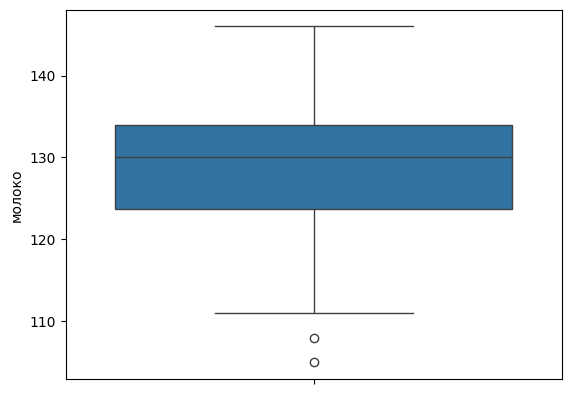

In [37]:
sns.boxplot(data['молоко'])
plt.show()

# Второе задание

In [433]:
data = pd.read_csv(r'data\tag_2.csv', encoding='cp1251', sep=';', decimal=',')
data.head()

,id,Price,RegistrationYear,Power,Brand,Model,VehicleType
0,1,480,1993,0,volkswagen,golf,NaN
1,2,9800,2004,163,jeep,grand,suv
2,3,1500,2001,75,volkswagen,golf,small
3,4,3600,2008,69,skoda,fabia,small
4,5,650,1995,102,bmw,3er,NaN


In [434]:
data[(data['Brand'] == 'volkswagen') & (data['Model'] == 'other')]

,id,Price,RegistrationYear,Power,Brand,Model,VehicleType
6,7,0,1980,50,volkswagen,other,sedan
37,38,11900,2002,129,volkswagen,other,other
111,112,3500,1991,160,volkswagen,other,coupe
195,196,999,1995,75,volkswagen,other,sedan
483,484,2390,2007,54,volkswagen,other,small
968,969,6500,1973,54,volkswagen,other,other


In [435]:
data2 = data.copy()
data2['brand-mark'] = data2.apply(lambda x: x['Brand'] + x['Model'], axis=1)
df = pd.DataFrame(data2['brand-mark'].value_counts()).reset_index()
df = data2.merge(df, on='brand-mark')
df[(df['count'] == 1) & (df['VehicleType'].isna())]

,id,Price,RegistrationYear,Power,Brand,Model,VehicleType,brand-mark,count
376,377,2350,2006,0,citroen,c1,NaN,citroenc1,1
794,795,600,2000,86,daewoo,lanos,NaN,daewoolanos,1
1020,1021,45,2015,0,mini,other,NaN,miniother,1
1156,1157,1300,2018,0,honda,cr_reihe,NaN,hondacr_reihe,1
1274,1275,750,2016,144,kia,carnival,NaN,kiacarnival,1
1275,1276,500,2006,70,ford,fusion,NaN,fordfusion,1


In [436]:
data.VehicleType.mode()

0    sedan
Name: VehicleType, dtype: object

In [437]:
tmp = data.groupby(['Brand', 'Model'], as_index=False).agg({'VehicleType': lambda x: x.mode().iloc[0] 
                                                            if not x.mode().empty else 'unknown'})

In [438]:
tmp

,Brand,Model,VehicleType
0,alfa_romeo,147,sedan
1,alfa_romeo,156,wagon
2,alfa_romeo,159,sedan
3,alfa_romeo,other,coupe
4,alfa_romeo,spider,convertible
...,...,...,...
202,volvo,c_reihe,convertible
203,volvo,other,sedan
204,volvo,v40,wagon
205,volvo,v50,wagon


In [439]:
data = data.merge(tmp, on=['Brand', 'Model'], how='left', suffixes=('', '_from_df1'))

data['VehicleType'] = data['VehicleType'].combine_first(data['VehicleType_from_df1'])


In [440]:
ans = data.groupby(['Brand', 'VehicleType'], as_index=False).agg({'Price': lambda x: x.median()})
ans = ans.sort_values('Price', ascending=False).reset_index().drop(['index'], axis=1)
ans.head(10)

,Brand,VehicleType,Price
0,volkswagen,suv,15600.0
1,bmw,suv,14800.0
2,chevrolet,wagon,13499.0
3,skoda,suv,13200.0
4,mercedes_benz,convertible,12790.0
5,volvo,convertible,12400.0
6,volkswagen,coupe,11500.0
7,porsche,convertible,10450.0
8,nissan,coupe,10200.0
9,peugeot,bus,10000.0


In [442]:
data[(data['Brand'] == 'volkswagen') & (data['Model'] == 'golf')]

,id,Price,RegistrationYear,Power,Brand,Model,VehicleType,VehicleType_from_df1
0,1,480,1993,0,volkswagen,golf,sedan,sedan
2,3,1500,2001,75,volkswagen,golf,small,sedan
8,9,999,1998,101,volkswagen,golf,small,sedan
31,32,245,1994,0,volkswagen,golf,sedan,sedan
34,35,350,2016,75,volkswagen,golf,sedan,sedan
...,...,...,...,...,...,...,...,...
1356,1357,1000,1999,75,volkswagen,golf,small,sedan
1370,1371,1800,2004,102,volkswagen,golf,wagon,sedan
1387,1388,390,1994,75,volkswagen,golf,convertible,sedan
1399,1400,690,1997,0,volkswagen,golf,convertible,sedan


# Третье задание

In [114]:
data = pd.read_csv(r'data\tag_3.csv', encoding='cp1251', sep=';', decimal=',')
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head()

,key,вес,затрачиваемая_мощность
0,1,1571.0,4.18
1,1,1604.0,NaN
2,1,1618.0,NaN
3,1,NaN,8.07
4,1,1606.0,7.41


In [117]:
data['вес'] = data['вес'].ffill()

data['затрачиваемая_мощность'] = data['затрачиваемая_мощность'].interpolate(limit=1)
median_values = data.groupby('key')['затрачиваемая_мощность'].transform('median')
data['затрачиваемая_мощность'].fillna(median_values, inplace=True)

ans = data.groupby('key', as_index=False).agg({
    'вес': 'sum',
    'затрачиваемая_мощность': 'sum'
}).round().astype(float).drop('key', axis=1)

C:\Users\User\AppData\Local\Temp\ipykernel_6448\2316468882.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['затрачиваемая_мощность'].fillna(median_values, inplace=True)


In [118]:
ans.head(30)

,вес,затрачиваемая_мощность
0,9630.0,39.0
1,7938.0,37.0
2,9589.0,41.0
3,8089.0,36.0
4,7945.0,33.0
5,7920.0,36.0
6,7944.0,35.0
7,7983.0,38.0
8,9540.0,45.0
9,11090.0,61.0


# Четвёртое задание

In [169]:
from scipy.stats import shapiro, mannwhitneyu, ttest_ind

In [170]:
data = pd.read_csv(r'data\tag_4.csv', encoding='cp1251', sep=';', decimal=',')
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head()

,покупательская_активность,тип_товара,история_продаж,неоплаченные_товары,выручка
0,Снизилась,товары для себя,575,2,4635.0
1,Снизилась,товары для себя,786,2,5213.0
2,Снизилась,товары для дома,935,5,4992.0
3,Снизилась,товары для себя,515,2,5268.0
4,Снизилась,товары для дома,1013,4,4932.0


In [171]:
group_1 = data[(data['тип_товара'] == 'товары для себя') & (data['покупательская_активность'] == 'Снизилась')]
group_2 = data[(data['тип_товара'] == 'товары для себя') & (data['покупательская_активность'] == 'Прежний уровень')]

group_1['выручка'] = group_1['выручка'].fillna(group_1['выручка'].median())
group_2['выручка'] = group_2['выручка'].fillna(group_2['выручка'].median())

In [172]:
IQR = data['выручка'].quantile(0.75) - data['выручка'].quantile(0.25)
upper_bound = data['выручка'].quantile(0.75) + 3 * IQR

group_1['выручка'] = group_1['выручка'].apply(lambda x: x if x <= upper_bound else group_1['выручка'].median())
group_2['выручка'] = group_2['выручка'].apply(lambda x: x if x <= upper_bound else group_2['выручка'].median())

In [173]:
group_1['группа'] = 1
group_2['группа'] = 2

In [ ]:
numeric_columns = data.select_dtypes('number').columns
ans = [['показатель', 'р-уровень', 'метод расчёта р-уровня']]

for i in numeric_columns:
    first_column = group_1[i]
    second_column = group_2[i]
    
    if shapiro(first_column)[1] > 0.05 and shapiro(second_column)[1] > 0.05:
        p_value = ttest_ind(first_column, second_column)[1]
        method = 'Стьюдент'
    
    else:
        p_value = mannwhitneyu(first_column, second_column)[1]
        method = 'Манн-Уитни'
    ans.append([i, float(round(p_value, 4)), method])

print(ans)

[['показатель', 'р-уровень', 'метод расчёта'], ['история_продаж', 0.0111, 'Манн-Уитни'], ['неоплаченные_товары', 0.0, 'Манн-Уитни'], ['выручка', 0.0056, 'Манн-Уитни']]


# Пятое задание

In [ ]:
data = pd.read_csv(r'data\tag_5.csv', encoding='cp1251', sep=';', decimal=',')
data.columns = data.columns.str.lower().str.replace(' ', '_')
data.head()

,id,price,registrationyear,power,brand,model
0,1,480,1993,0,volkswagen,golf
1,2,9800,2004,163,jeep,grand
2,3,1500,2001,75,volkswagen,golf
3,4,3600,2008,69,skoda,fabia
4,5,650,1995,102,bmw,3er


In [249]:
def f(x):
    if x <= 1980:
        return 'раритет'
        
    if 1980 < x <= 2010:
        return 'старые'
        
    if 2010 < x <= 2020:
        return 'массовые'
        
    return 'современные'

In [250]:
data['age'] = data['registrationyear'].apply(f)

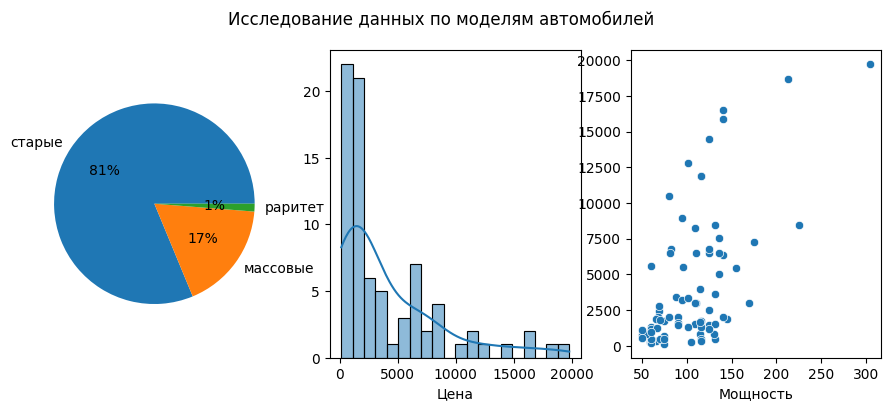

<Figure size 640x480 with 0 Axes>

In [252]:
brand = input()

data = data[(data['brand'] == brand) & (data['power'] > 30) & (data['price'] > 0)]


fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(11, 4))
fig.suptitle('Исследование данных по моделям автомобилей')


quality_counts = data['age'].value_counts(normalize=True) * 100
labels = quality_counts.index.astype(str)
sizes = quality_counts.values
axes[0].pie(sizes, labels=labels, autopct='%1.0f%%')

sns.histplot(
    data['price'],
    bins=20, kde=True, ax=axes[1]
)

b = sns.scatterplot(data=data, x='power', 
                    y='price').get_figure()


for axis in axes:
    axis.set_ylabel('')

axes[1].set_xlabel('Цена')
axes[2].set_xlabel('Мощность')

plt.show()
plt.savefig('target_6_5.png')
